In [197]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np

#%matplotlib notebook

In [198]:
data = pd.read_csv('Social_Network_Ads.csv')
data.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


# Data set includes details of employees :
- user_id
- Gender 
- Age
- EstimatedSalary
- Purchased
    - this data tells us that wheather an employee purchase the product based on age,gender and salary 

In [199]:
from sklearn.preprocessing import LabelEncoder,StandardScaler
le = LabelEncoder()

In [207]:
data['Gender']= le.fit_transform(data['Gender']) # Encoding the Gender Female - 0 and Male -1
data.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,1,19,19000,0
1,15810944,1,35,20000,0
2,15668575,0,26,43000,0
3,15603246,0,27,57000,0
4,15804002,1,19,76000,0


In [255]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
#building the decision tree using ENTROPY 
DT = DecisionTreeClassifier(criterion = 'entropy',max_depth=3,
                            max_leaf_nodes=6,min_impurity_split=0.05,min_impurity_decrease=0.002)
# removing the insignificient leaf nodes my using min_impurity_split=0.05,min_impurity_decrease=0.002
x = data.drop(['Purchased','User ID'],axis =1)#droping column the 'User ID' as it has no weightage in building the model 
y = data['Purchased']

In [256]:
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state = 0)

In [257]:
sc =StandardScaler()
x_train = sc.fit_transform(x_train)
x_test  = sc.transform(x_test)

In [258]:
DT.fit(x_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=3,
                       max_features=None, max_leaf_nodes=6,
                       min_impurity_decrease=0.002, min_impurity_split=0.05,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

[Text(697.5, 713.475, 'Age <= 0.631\nentropy = 0.951\nsamples = 100.0%\nvalue = [0.63, 0.37]'),
 Text(418.5, 509.625, 'EstimatedSalary <= 0.606\nentropy = 0.693\nsamples = 71.7%\nvalue = [0.814, 0.186]'),
 Text(279.0, 305.775, 'Age <= -0.161\nentropy = 0.241\nsamples = 58.7%\nvalue = [0.96, 0.04]'),
 Text(139.5, 101.92499999999995, 'entropy = 0.0\nsamples = 38.0%\nvalue = [1.0, 0.0]'),
 Text(418.5, 101.92499999999995, 'entropy = 0.509\nsamples = 20.7%\nvalue = [0.887, 0.113]'),
 Text(558.0, 305.775, 'entropy = 0.619\nsamples = 13.0%\nvalue = [0.154, 0.846]'),
 Text(976.5, 509.625, 'EstimatedSalary <= -0.814\nentropy = 0.645\nsamples = 28.3%\nvalue = [0.165, 0.835]'),
 Text(837.0, 305.775, 'entropy = 0.211\nsamples = 10.0%\nvalue = [0.033, 0.967]'),
 Text(1116.0, 305.775, 'Age <= 1.423\nentropy = 0.789\nsamples = 18.3%\nvalue = [0.236, 0.764]'),
 Text(976.5, 101.92499999999995, 'entropy = 0.946\nsamples = 11.0%\nvalue = [0.364, 0.636]'),
 Text(1255.5, 101.92499999999995, 'entropy = 0.26

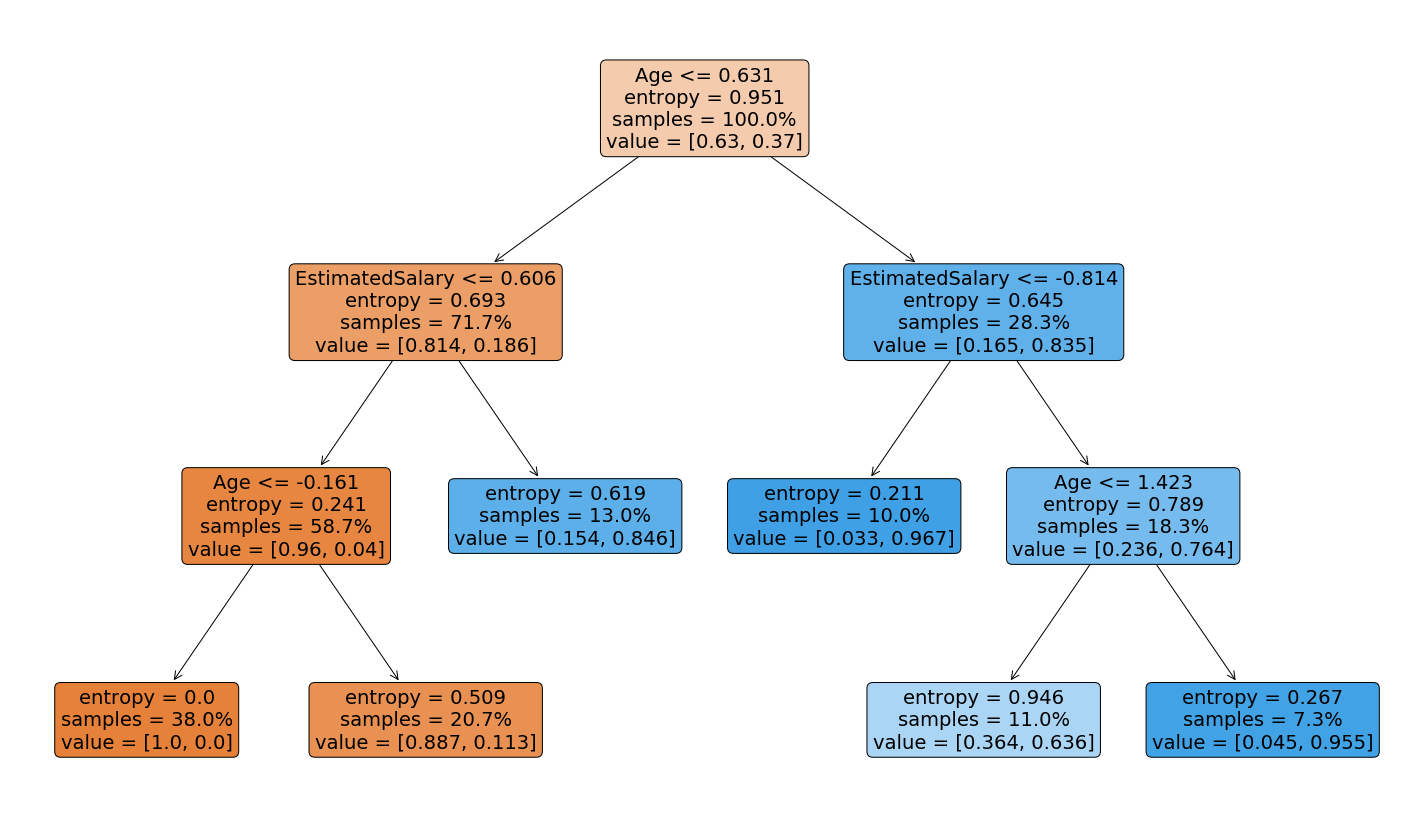

In [259]:
from sklearn import tree
from matplotlib import pyplot as plt

cols = list(x.columns.values)

plt.figure(figsize=(25,15))
tree.plot_tree(DT.fit(x_train,y_train),feature_names=cols, filled=True, 
               precision=3,proportion=True,rounded=True)
#class_names=['No_Buy','Buy']    
#clf.fit(x_dummies,y),feature_names=cols, filled=True,precision=3,proportion=True,rounded=True


In [260]:
y_pred = DT.predict(x_test)

In [247]:
y_pred

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1], dtype=int64)

In [248]:
from sklearn.metrics import accuracy_score

In [240]:
accuracy_score(y_pred,y_test) # after pruning the tree the accuracy is 94%

0.94